<a href="https://colab.research.google.com/github/PhDSGilber/Embeddings-to-Named-entity-recognition-NER-use-Deep-Learning/blob/main/NER_CoNLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conference on Natural Language Learning (CoNLL) - 2002**

CONLL-2002 is a leading resource in the field of natural language processing, specifically in the area of named entity recognition (NER). This dataset was presented at the Conference on Natural Machine and Language Learning (CoNLL) in 2002, with the main goal of establishing a standard for the evaluation and comparison of different methods and algorithms in NER tasks.

The CONLL-2002 dataset is made up of texts in two languages: Spanish and Dutch. These texts come primarily from news sources, providing a realistic and challenging environment for the application of NER techniques. The data is annotated with information about named entities, classifying them into categories such as names of people, locations, organizations, and others.

The creation of CONLL-2002 arose from the need for a standardized data set that would allow researchers and developers in the field of natural language processing to effectively compare the accuracy and effectiveness of different applied machine learning approaches and models. to the task of NER. This dataset has become a fundamental reference for the scientific community, providing a common framework for advancement and innovation in named entity recognition.

Reference:
*   https://www.clips.uantwerpen.be/conll2002/ner/
*   https://paperswithcode.com/dataset/conll-2002
*   https://aclanthology.org/W02-2024/




# **Requirements**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PNL

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/12uRPLAvld142dGjiom5XJyUo40q-BojS/PNL


In [2]:
!pip install -r requirements.txt
!pip install tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 569.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=4cd5a4219f1a958cfa2803b4641f6b3c3637d3246b30f96ffda7d4bf7fdcdf32
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [2]:
!pip install flair
from flair.data import Sentence
from flair.models import SequenceTagger
tagger_flair = SequenceTagger.load("flair/ner-spanish-large")

pytorch_model.bin:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

2023-12-15 23:57:33,476 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-LOC, S-ORG, B-PER, I-PER, E-PER, S-MISC, B-ORG, E-ORG, S-PER, I-ORG, B-LOC, E-LOC, B-MISC, E-MISC, I-MISC, I-LOC, <START>, <STOP>


In [3]:
import spacy
!python -m spacy download es_core_news_sm
nlp_spacy = spacy.load("es_core_news_sm")
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter
import tensorflow as tf

from model_base import Model2NER

import numpy as np

from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard,CSVLogger
from tensorflow.keras.metrics import F1Score,Recall,Precision
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow_addons.optimizers import AdamW

from utils import build_matrix_embeddings as bme, plot_model_performance, logits_to_tokens, report_to_df
from seqeval.metrics import classification_report as seqclarep
from seqeval.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore', message='.*seems not to be NE tag.*')
warnings.filterwarnings('ignore', message='.*Precision is ill-defined and being set to 0.0 due to no predicted samples.*')
import importlib
import model_base
from tensorflow.keras.models import load_model

2023-12-15 23:03:11.175144: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 23:03:11.186431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 23:03:11.188128: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 23:03:14.552259: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# **Exploratory Data Analysis (EDA)**

In [4]:
# Upload dataset
dataset = load_dataset("conll2002", "es")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/8324 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1916 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1518 [00:00<?, ? examples/s]

In [5]:
# Convert Dataset2df
def dataset_to_dataframe(dataset):
    df = pd.DataFrame(dataset)
    df['token_count'] = df['tokens'].apply(len)
    return df

In [6]:
# Convert Dataset2df
def flatten_and_count_tags(dataset, tag_mapping, tag_column):
    all_tags = list(chain.from_iterable(dataset[tag_column]))
    tag_names = [tag_mapping[tag] for tag in all_tags]
    return Counter(tag_names)

In [7]:
# Dataset to df
train_df = dataset_to_dataframe(dataset['train'])
val_df = dataset_to_dataframe(dataset['validation'])
test_df = dataset_to_dataframe(dataset['test'])

# AED
train_df

,id,tokens,pos_tags,ner_tags,token_count
0,0,"[Melbourne, (, Australia, ), ,, 25, may, (, EF...","[29, 21, 29, 22, 13, 59, 28, 21, 28, 22, 20]","[5, 0, 5, 0, 0, 0, 0, 0, 3, 0, 0]",11
1,1,[-],[16],[0],1
2,2,"[El, Abogado, General, del, Estado, ,, Daryl, ...","[4, 28, 1, 40, 28, 13, 47, 28, 13, 47, 38, 4, ...","[0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ...",40
3,3,"[La, petición, del, Abogado, General, tiene, l...","[4, 28, 40, 28, 1, 47, 28, 38, 40, 3, 7, 28, 4...","[0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, ...",61
4,4,"[Esta, página, web, lleva, un, mes, de, existe...","[6, 28, 1, 47, 7, 28, 40, 28, 13, 28, 40, 4, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50
...,...,...,...,...,...
8319,8319,"[Pese, a, las, nuevas, manifestaciones, de, lo...","[48, 40, 4, 1, 28, 40, 4, 28, 40, 28, 13, 4, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, ...",34
8320,8320,"[Ese, día, se, reunirán, los, ministros, de, R...","[6, 28, 30, 47, 4, 28, 40, 28, 1, 13, 28, 28, ...","[0, 0, 0, 0, 0, 0, 0, 7, 8, 0, 1, 2, 0, 0, 7, ...",37
8321,8321,"[El, Movimiento, ocupó, hace, tres, semanas, e...","[4, 28, 47, 47, 8, 28, 28, 1, 40, 8, 28, 40, 2...","[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",52
8322,8322,"[Tras, abandonar, las, oficinas, ocupadas, y, ...","[40, 49, 4, 28, 1, 2, 49, 4, 28, 40, 28, 1, 13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ...",35


In [8]:
print("General information of dataset")
print(train_df.info())

General information of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8324 entries, 0 to 8323
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           8324 non-null   object
 1   tokens       8324 non-null   object
 2   pos_tags     8324 non-null   object
 3   ner_tags     8324 non-null   object
 4   token_count  8324 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 325.3+ KB
None


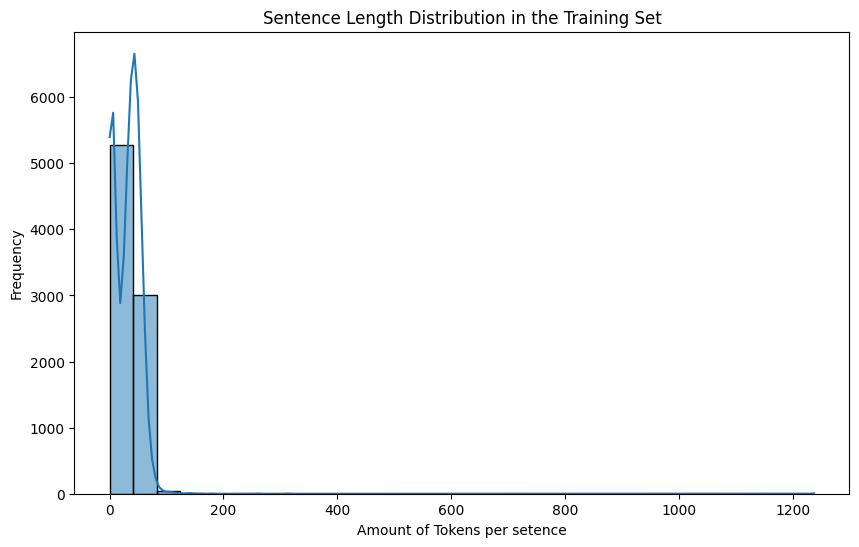

In [9]:
# Analysis of sentence length (in terms of number of tokens)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['token_count'], bins=30, kde=True)
plt.title("Sentence Length Distribution in the Training Set")
plt.xlabel("Amount of Tokens per setence")
plt.ylabel("Frequency")
plt.show()

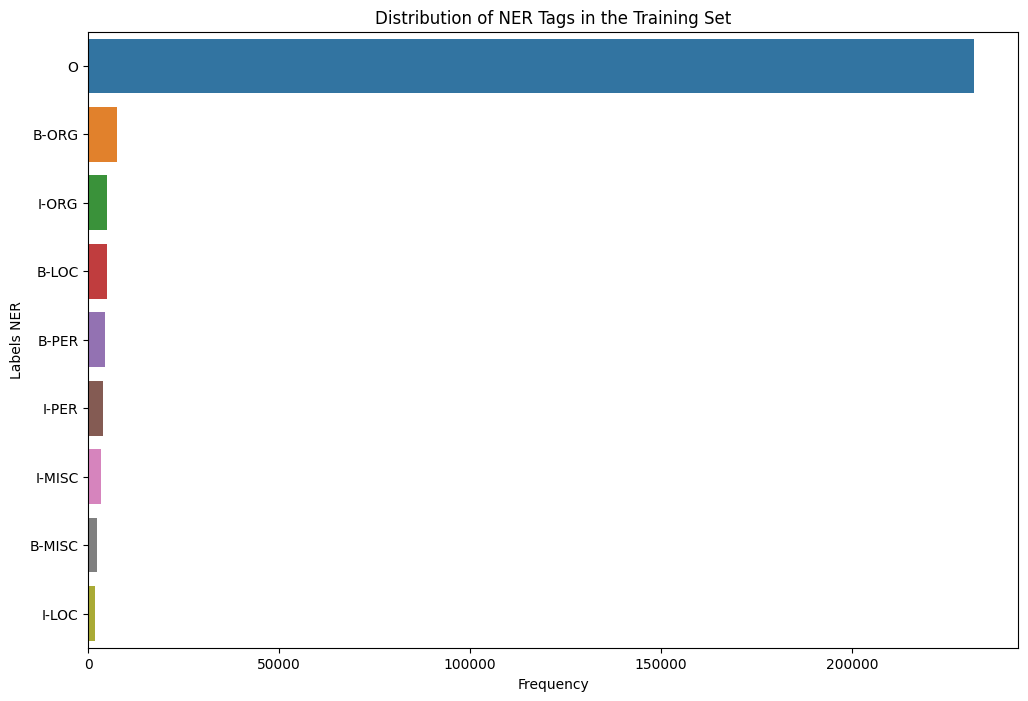

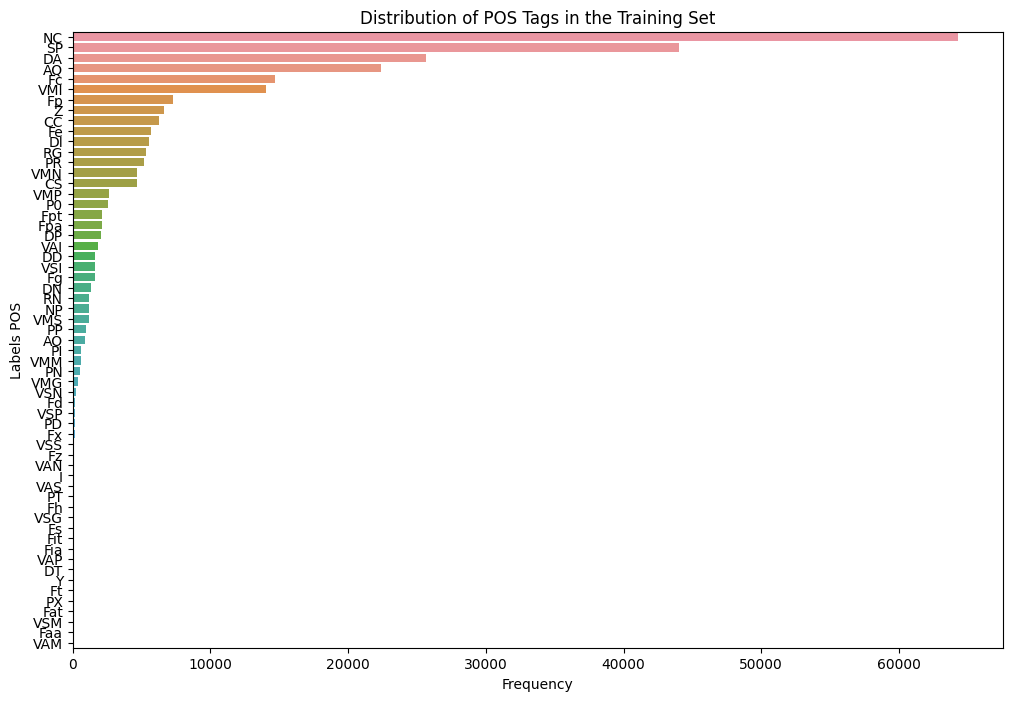

In [10]:
# Mapeos de las etiquetas
ner_index = ["O", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC", "B-MISC", "I-MISC"]
pos_index = ['AO', 'AQ', 'CC', 'CS', 'DA', 'DE', 'DD', 'DI', 'DN', 'DP', 'DT', 'Faa', 'Fat', 'Fc', 'Fd', 'Fe', 'Fg', 'Fh', 'Fia', 'Fit', 'Fp', 'Fpa', 'Fpt', 'Fs', 'Ft', 'Fx', 'Fz', 'I', 'NC', 'NP', 'P0', 'PD', 'PI', 'PN', 'PP', 'PR', 'PT', 'PX', 'RG', 'RN', 'SP', 'VAI', 'VAM', 'VAN', 'VAP', 'VAS', 'VMG', 'VMI', 'VMM', 'VMN', 'VMP', 'VMS', 'VSG', 'VSI', 'VSM', 'VSN', 'VSP', 'VSS', 'Y', 'Z']

# Frecuency of NER
ner_counts = flatten_and_count_tags(dataset['train'], ner_index, 'ner_tags')
df_ner = pd.DataFrame(ner_counts.items(), columns=['NER Tag', 'Count']).sort_values('Count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='NER Tag', data=df_ner)
plt.title("Distribution of NER Tags in the Training Set")
plt.xlabel("Frequency")
plt.ylabel("Labels NER")
plt.show()

# Frecuency of POS
pos_counts = flatten_and_count_tags(dataset['train'], pos_index , 'pos_tags')
df_pos = pd.DataFrame(pos_counts.items(), columns=['POS Tag', 'Count']).sort_values('Count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='POS Tag', data=df_pos)
plt.title("Distribution of POS Tags in the Training Set")
plt.xlabel("Frequency")
plt.ylabel("Labels POS")
plt.show()

# **Data Pre-Processing**

In [11]:
def num2label(listofnum):
    map = {2: "O",3: "B-PER",4: "I-PER",
             5: "B-ORG",6: "I-ORG",7: "B-LOC",
             8: "I-LOC",9: "B-MISC",10: "I-MISC",
            0:"-PAD-", 1:"-OOV-"}
    labels = [map[num] for num in listofnum]

    return labels

def label2num(listoflabel):
    map = {"O": 0,"B-PER": 1,"I-PER": 2,
           "B-ORG": 3,"I-ORG": 4,"B-LOC": 5,
           "I-LOC": 6,"B-MISC": 7,"I-MISC": 8,
           "-PAD-": 0,"-OOV-":1}
    num = [map[label] for label in listoflabel]

    return num


In [12]:
train_df['ner_tags'] = train_df['ner_tags'].apply(lambda x: [i + 2 for i in x])
val_df ['ner_tags'] = val_df ['ner_tags'].apply(lambda x: [i + 2 for i in x])
test_df['ner_tags'] = test_df['ner_tags'].apply(lambda x: [i + 2 for i in x])

X_train = train_df['tokens'].values.tolist()
y_train = train_df['ner_tags'].values.tolist()

X_test = test_df['tokens'].values.tolist()
y_test = test_df['ner_tags'].values.tolist()

X_eval = val_df['tokens'].values.tolist()
y_eval = val_df['ner_tags'].values.tolist()

In [13]:
# print(X_train[2])
# print(num2label(y_train[2]))

In [14]:
words, tagsss = set([]), set([])

for s in (X_train + X_eval + X_test):
    for w in s:
        words.add(w.lower())

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs

In [15]:
X_train_int, X_eval_int, X_test_int= [], [], []

for s in X_train:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])

    X_train_int.append(s_int)

for s in X_eval:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])

    X_eval_int.append(s_int)

for s in X_test:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])

    X_test_int.append(s_int)

In [16]:
print("Longitudes de las Matrices:")
print(len(X_train_int))
print(len(X_test_int))
print(len(X_eval_int))
print(len(y_train))
print(len(y_test))
print(len(y_eval))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:\n")
print(X_train_int[0])
print(X_test_int[0])
print(X_eval_int[0])
print(y_train[0])
print(y_test[0])
print(y_eval[0])


Longitudes de las Matrices:
8324
1518
1916
8324
1518
1916

Muestra de Datos presentes en las Matrices con las transformaciones:

[8292, 13341, 16583, 18890, 20106, 9019, 24575, 13341, 13600, 18890, 15348]
[4030, 296, 20106, 9061, 24575, 13341, 21066, 18890, 15348]
[14632, 20641, 13341, 14941, 18890, 20106, 9061, 24575, 13341, 21066, 18890, 15348]
[7, 2, 7, 2, 2, 2, 2, 2, 5, 2, 2]
[7, 8, 2, 2, 2, 2, 5, 2, 2]
[7, 8, 2, 7, 2, 2, 2, 2, 2, 5, 2, 2]


In [17]:
MAX_LENGTH=202
X_train_int = pad_sequences(X_train_int, maxlen=MAX_LENGTH, padding='post')
X_test_int = pad_sequences(X_test_int, maxlen=MAX_LENGTH, padding='post')
X_eval_int = pad_sequences(X_eval_int, maxlen=MAX_LENGTH, padding='post')
y_train = pad_sequences(y_train, maxlen=MAX_LENGTH, padding='post')
y_test = pad_sequences(y_test, maxlen=MAX_LENGTH, padding='post')
y_eval = pad_sequences(y_eval, maxlen=MAX_LENGTH, padding='post')

In [18]:
print("Longitudes de las Matrices:")
print(len(X_train_int))
print(len(X_test_int))
print(len(X_eval_int))
print(len(y_train))
print(len(y_test))
print(len(y_eval))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:\n")
print(X_train_int[0])
print(X_test_int[0])
print(X_eval_int[0])
print(y_train[0])
print(y_test[0])
print(y_eval[0])

Longitudes de las Matrices:
8324
1518
1916
8324
1518
1916

Muestra de Datos presentes en las Matrices con las transformaciones:

[ 8292 13341 16583 18890 20106  9019 24575 13341 13600 18890 15348     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0  

# **Models Training**

Model 2

In [ ]:
# importlib.reload(model_base)
# from model_base import Model2NER

In [ ]:
Model2 = Model2NER(vocab_size = len(word2index),
          embedding_dim = 300,
          word2index = word2index,
          max_length = 202 )


In [ ]:
Model2.create_embedding(type_embbeding="fasttext",
                         path_embedding = "./text_fasttext_skip_model300.txt")


In [ ]:
Model2_compile = Model2.create(bilstm_units = 50,
              lstm_units = None,
              optimizer = tf.keras.optimizers.AdamW() ,
              metrics = ['accuracy'],
              summary = True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 202)]             0         
                                                                 
 embedding (Embedding)       (None, 202, 300)          8515200   
                                                                 
 bidirectional (Bidirection  (None, 202, 100)          140400    
 al)                                                             
                                                                 
 dense (Dense)               (None, 202, 11)           1111      
                                                                 
Total params: 8656711 (33.02 MB)
Trainable params: 8656711 (33.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%cd /content/drive/MyDrive/PNL
!rm -r ./TRAIN/MODEL_2/checkpoints/*
!rm -r ./TRAIN/MODEL_2/logs/*
!rm -r ./TRAIN/MODEL_2/csv/*
!touch "./TRAIN/MF2/csv/model_2.csv"


path_checkpoint = './TRAIN/MODEL_2/checkpoints'
path_tensorboard = './TRAIN/MODEL_2/logs'
path_csv_train = './TRAIN/MODEL_2/csv/model_2.csv'

model_checkpoint_callback = ModelCheckpoint(filepath = path_checkpoint
                                            ,save_best_only = False
                                            ,monitor='f1_score'
                                            ,save_freq ='epoch'
                                            ,save_weights_only = False)

tensorboard_callback = TensorBoard(log_dir = path_tensorboard , histogram_freq=1)

csv_callback = CSVLogger(path_csv_train)

EPOCHS = 200

/content/drive/.shortcut-targets-by-id/12uRPLAvld142dGjiom5XJyUo40q-BojS/PNL
rm: cannot remove './TRAIN/MODEL_2/checkpoints/*': No such file or directory
rm: cannot remove './TRAIN/MODEL_2/logs/*': No such file or directory
rm: cannot remove './TRAIN/MODEL_2/csv/*': No such file or directory
touch: cannot touch './TRAIN/MF2/csv/model_2.csv': No such file or directory


In [ ]:
Model2_compile.fit(X_train_int,
                   y_train,
                   validation_data = (X_eval_int, y_eval),
                   validation_freq=1,
                   epochs=EPOCHS,
                   callbacks=[model_checkpoint_callback,tensorboard_callback,csv_callback],
                   batch_size=128)

Epoch 1/200
66/66 [==============================] - 73s 974ms/step - accuracy: 0.3149 - loss: 93.4111 - crf_loss: 93.4111 - val_accuracy: 0.3351 - val_loss: 22.7081 - val_crf_loss: 22.7081
Epoch 2/200
66/66 [==============================] - 59s 904ms/step - accuracy: 0.3377 - loss: 19.6691 - crf_loss: 19.6691 - val_accuracy: 0.3351 - val_loss: 18.3977 - val_crf_loss: 18.3977
Epoch 3/200
66/66 [==============================] - 59s 904ms/step - accuracy: 0.3514 - loss: 15.4024 - crf_loss: 15.4024 - val_accuracy: 0.4092 - val_loss: 14.5060 - val_crf_loss: 14.5060
Epoch 4/200
66/66 [==============================] - 59s 900ms/step - accuracy: 0.4516 - loss: 11.1682 - crf_loss: 11.1682 - val_accuracy: 0.4896 - val_loss: 12.5264 - val_crf_loss: 12.5264
Epoch 5/200
66/66 [==============================] - 57s 869ms/step - accuracy: 0.5320 - loss: 9.0431 - crf_loss: 9.0431 - val_accuracy: 0.5125 - val_loss: 11.6367 - val_crf_loss: 11.6367
Epoch 6/200
66/66 [==============================] -

Model 3

In [19]:
Model3 = Model2NER(vocab_size = len(word2index),
          embedding_dim = 300,
          word2index = word2index,
          max_length = 202 )


In [20]:
Model3.create_embedding(type_embbeding="fasttext",
                         path_embedding = "./text_fasttext_skip_model300.txt")

In [21]:
Model3_compile = Model3.create(bilstm_units = 50,
              lstm_units = 50,
              optimizer = tf.keras.optimizers.AdamW() ,
              metrics = ['accuracy'],
              summary = True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 202)]             0         
                                                                 
 embedding (Embedding)       (None, 202, 300)          8515200   
                                                                 
 bidirectional (Bidirection  (None, 202, 100)          140400    
 al)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 202, 50)           30200     
                                                                 
 dense (Dense)               (None, 202, 11)           561       
                                                                 
Total params: 8686361 (33.14 MB)
Trainable params: 8686361 (33.14 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [ ]:
%cd /content/drive/MyDrive/PNL
!rm -r ./TRAIN/MODEL_3/checkpoints/*
!rm -r ./TRAIN/MODEL_3/logs/*
!rm -r ./TRAIN/MODEL_3/csv/*
!touch "./TRAIN/MODEL_3/csv/model_2.csv"


path_checkpoint = './TRAIN/MODEL_3/checkpoints'
path_tensorboard = './TRAIN/MODEL_3/logs'
path_csv_train = './TRAIN/MODEL_3/csv/model_3.csv'

model_checkpoint_callback = ModelCheckpoint(filepath = path_checkpoint
                                            ,save_best_only = False
                                            ,monitor='acurracy'
                                            ,save_freq ='epoch'
                                            ,save_weights_only = False)

tensorboard_callback = TensorBoard(log_dir = path_tensorboard , histogram_freq=1)

csv_callback = CSVLogger(path_csv_train)

EPOCHS = 200

/content/drive/.shortcut-targets-by-id/12uRPLAvld142dGjiom5XJyUo40q-BojS/PNL
rm: cannot remove './TRAIN/MODEL_3/checkpoints/*': No such file or directory
rm: cannot remove './TRAIN/MODEL_3/logs/*': No such file or directory
rm: cannot remove './TRAIN/MODEL_3/csv/*': No such file or directory


In [ ]:
Model3_compile.fit(X_train_int,
                   y_train,
                   validation_data = (X_eval_int, y_eval),
                   validation_freq=1,
                   epochs=EPOCHS,
                   callbacks=[model_checkpoint_callback,tensorboard_callback,csv_callback],
                   batch_size=128)

Epoch 1/200
66/66 [==============================] - 85s 1s/step - accuracy: 0.2764 - loss: 104.1046 - crf_loss: 104.1046 - val_accuracy: 0.3351 - val_loss: 26.2266 - val_crf_loss: 26.2266
Epoch 2/200
66/66 [==============================] - 64s 969ms/step - accuracy: 0.3377 - loss: 21.0352 - crf_loss: 21.0352 - val_accuracy: 0.3351 - val_loss: 22.4017 - val_crf_loss: 22.4017
Epoch 3/200
66/66 [==============================] - 65s 992ms/step - accuracy: 0.3377 - loss: 18.5295 - crf_loss: 18.5295 - val_accuracy: 0.3351 - val_loss: 18.5171 - val_crf_loss: 18.5171
Epoch 4/200
66/66 [==============================] - 60s 913ms/step - accuracy: 0.3377 - loss: 15.5349 - crf_loss: 15.5349 - val_accuracy: 0.3351 - val_loss: 15.4897 - val_crf_loss: 15.4897
Epoch 5/200
66/66 [==============================] - 61s 934ms/step - accuracy: 0.3381 - loss: 12.2914 - crf_loss: 12.2914 - val_accuracy: 0.3361 - val_loss: 14.0392 - val_crf_loss: 14.0392
Epoch 6/200
66/66 [==============================] 

# **Results**

Metrics

In [ ]:
def f1score(y_true, y_pred):

  index2tag = {2: "O",3: "B-PER",4: "I-PER",
               5: "B-ORG",6: "I-ORG",7: "B-LOC",
               8: "I-LOC",9: "B-MISC",10: "I-MISC",
               0:"-PAD-", 1:"-OOV-"}

  y_true = logits_to_tokens(y_true, index2tag)
  y_pred = logits_to_tokens(y_pred, index2tag)

  score = f1_score(y_true,y_pred)

  return score

def recall(y_true, y_pred):

  index2tag = {2: "O",3: "B-PER",4: "I-PER",
               5: "B-ORG",6: "I-ORG",7: "B-LOC",
               8: "I-LOC",9: "B-MISC",10: "I-MISC",
               0:"-PAD-", 1:"-OOV-"}

  y_true = logits_to_tokens(y_true, index2tag)
  y_pred = logits_to_tokens(y_pred, index2tag)

  score = recall_score(y_true,y_pred)


  return score


def precision(y_true, y_pred):

  index2tag = {2: "O",3: "B-PER",4: "I-PER",
               5: "B-ORG",6: "I-ORG",7: "B-LOC",
               8: "I-LOC",9: "B-MISC",10: "I-MISC",
               0:"-PAD-", 1:"-OOV-"}

  y_true = logits_to_tokens(y_true, index2tag)
  y_pred = logits_to_tokens(y_pred, index2tag)

  score =  precision_score(y_true,y_pred)

  return score

Model 2

In [ ]:
y_pred_model2 = Model2_compile.predict(X_test_int)
p_m2 = precision(y_test, y_pred_model2 )
r_m2 = recall(y_test, y_pred_model2 )
f_m2 = f1score(y_test, y_pred_model2 )

print('The Score of model 2')
print('\n')
print('Models inf: 200 Epochs, Opt AdamW')
print('\n')
print('Precision: '+ str(p_m2 * 100)+ ' %')
print('Recall: '+ str(r_m2 * 100)+ ' %')
print('F1Score: '+ str(f_m2 * 100)+ ' %')

48/48 [==============================] - 8s 173ms/step
The Score of model 2


Models inf: 200 Epochs, Opt AdamW


Precision: 67.95060276389297 %
Recall: 64.9339702163529 %
F1Score: 66.40804597701151 %


Model 3

In [33]:
y_pred_model3 = Model3_compile.predict(X_test_int)
p_m3 = precision(y_test, y_pred_model3 )
r_m3 = recall(y_test, y_pred_model3 )
f_m3 = f1score(y_test, y_pred_model3 )

print('The Score of model 3')
print('\n')
print('Models inf: 200 Epochs, Opt AdamW, add LSTM')
print('\n')
print('Precision: '+ str(p_m3 * 100)+ ' %')
print('Recall: '+ str(r_m3 * 100)+ ' %')
print('F1Score: '+ str(f_m3 * 100)+ ' %')

The Score of model 3


Models inf: 200 Epochs, Opt AdamW, add LSTM


Precision: 70.4932735426009 %
Recall: 66.25456588929475 %
F1Score: 68.30822711471612 %


Text test

In [27]:
def text_to_int(text,word2index,MAX_LENGTH):
  doc = nlp_spacy (text)
  sentences = [[token.text for token in sent] for sent in doc.sents]
  sentences2 = sentences
  ent = 0
  sentences_int = []
  for sentence in sentences:
    sente_int = []
    for word in sentence:
      try:
        sente_int.append(word2index[word.lower()])
      except KeyError:
        ent+=1
        sente_int.append(len(word2index)+ent)
    sentences_int.append(sente_int)

  sentences_int = pad_sequences(sentences_int, maxlen=MAX_LENGTH, padding='post')


  return sentences_int,sentences2

In [ ]:
index2tag = {2: "O",3: "B-PER",4: "I-PER",
             5: "B-ORG",6: "I-ORG",7: "B-LOC",
             8: "I-LOC",9: "B-MISC",10: "I-MISC",
             0:"-PAD-", 1:"-OOV-"}

text = 'La Federacion nacional de cafeteros de Colombia es una entidad del estado, creada en los años 70’s. El primer presidente el Dr Augusto Guerra conto con el aval de la Asociación Colombiana de Aviación. En varias ciudades colombianas; Cali, medellín, corozal funciona la entidad. Estas personas viene del instituto colombiano del cafe ubicado en la calle Cali.'
X_text, tok = text_to_int(text,word2index,MAX_LENGTH)

y_text_pre_m2 = Model2_compile.predict(X_text,verbose=0)

y_text_pre_m2 = logits_to_tokens(y_text_pre_m2 , index2tag)
y_text_pre_m2 = [[item for item in sublist if item != '-PAD-'] for sublist in y_text_pre_m2]

flattened_words = [word for sentence in tok for word in sentence]
flattened_tags = [tag for tag_list in y_text_pre_m2 for tag in tag_list]


print('MODEL 2')
print(' \n ')
data = list(zip(flattened_words, flattened_tags))
table = tabulate(data, headers=['Word', 'Tag'], tablefmt='grid')
print(table)


MODEL 2
 
 
+-------------+--------+
| Word        | Tag    |
+=============+========+
| La          | O      |
+-------------+--------+
| Federacion  | B-ORG  |
+-------------+--------+
| nacional    | I-ORG  |
+-------------+--------+
| de          | I-ORG  |
+-------------+--------+
| cafeteros   | I-ORG  |
+-------------+--------+
| de          | I-ORG  |
+-------------+--------+
| Colombia    | I-ORG  |
+-------------+--------+
| es          | O      |
+-------------+--------+
| una         | O      |
+-------------+--------+
| entidad     | O      |
+-------------+--------+
| del         | O      |
+-------------+--------+
| estado      | B-ORG  |
+-------------+--------+
| ,           | O      |
+-------------+--------+
| creada      | O      |
+-------------+--------+
| en          | O      |
+-------------+--------+
| los         | O      |
+-------------+--------+
| años        | O      |
+-------------+--------+
| 70’s        | O      |
+-------------+--------+
| .          

In [35]:
index2tag = {2: "O",3: "B-PER",4: "I-PER",
             5: "B-ORG",6: "I-ORG",7: "B-LOC",
             8: "I-LOC",9: "B-MISC",10: "I-MISC",
             0:"-PAD-", 1:"-OOV-"}
text = 'La Federacion nacional de cafeteros de Colombia es una entidad del estado, creada en los años 70’s. El primer presidente el Dr Augusto Guerra conto con el aval de la Asociación Colombiana de Aviación. En varias ciudades colombianas; Cali, medellín, corozal funciona la entidad. Estas personas viene del instituto colombiano del cafe ubicado en la calle Cali.'
X_text, tok = text_to_int(text,word2index,MAX_LENGTH)

y_text_pre_m3 = Model3_compile.predict(X_text,verbose=0)

y_text_pre_m3 = logits_to_tokens(y_text_pre_m3 , index2tag)
y_text_pre_m3 = [[item for item in sublist if item != '-PAD-'] for sublist in y_text_pre_m3]

flattened_words = [word for sentence in tok for word in sentence]
flattened_tags = [tag for tag_list in y_text_pre_m3 for tag in tag_list]


print('MODEL 3')
print(' \n ')
data = list(zip(flattened_words, flattened_tags))
table = tabulate(data, headers=['Word', 'Tag'], tablefmt='grid')
print(table)

MODEL 3
 
 
+-------------+--------+
| Word        | Tag    |
+=============+========+
| La          | O      |
+-------------+--------+
| Federacion  | B-ORG  |
+-------------+--------+
| nacional    | I-ORG  |
+-------------+--------+
| de          | I-ORG  |
+-------------+--------+
| cafeteros   | I-ORG  |
+-------------+--------+
| de          | I-ORG  |
+-------------+--------+
| Colombia    | I-ORG  |
+-------------+--------+
| es          | O      |
+-------------+--------+
| una         | O      |
+-------------+--------+
| entidad     | O      |
+-------------+--------+
| del         | O      |
+-------------+--------+
| estado      | B-ORG  |
+-------------+--------+
| ,           | O      |
+-------------+--------+
| creada      | O      |
+-------------+--------+
| en          | O      |
+-------------+--------+
| los         | O      |
+-------------+--------+
| años        | O      |
+-------------+--------+
| 70’s        | O      |
+-------------+--------+
| .          

In [9]:
text = 'La Federacion nacional de cafeteros de Colombia es una entidad del estado, creada en los años 70’s. El primer presidente el Dr Augusto Guerra conto con el aval de la Asociación Colombiana de Aviación. En varias ciudades colombianas; Cali, medellín, corozal funciona la entidad. Estas personas viene del instituto colombiano del cafe ubicado en la calle Cali.'
sentence = Sentence(text)
tagger_flair.predict(sentence)
for entity in sentence.get_spans('ner'):
  print(entity)

Span[1:7]: "Federacion nacional de cafeteros de Colombia" → ORG (0.9994)
Span[24:27]: "Dr Augusto Guerra" → PER (0.9998)
Span[33:37]: "Asociación Colombiana de Aviación" → ORG (0.9999)
Span[43:44]: "Cali" → LOC (0.9999)
Span[45:46]: "medellín" → LOC (0.9964)
Span[47:48]: "corozal" → LOC (0.9794)
Span[63:65]: "calle Cali" → LOC (0.9998)


Graphs

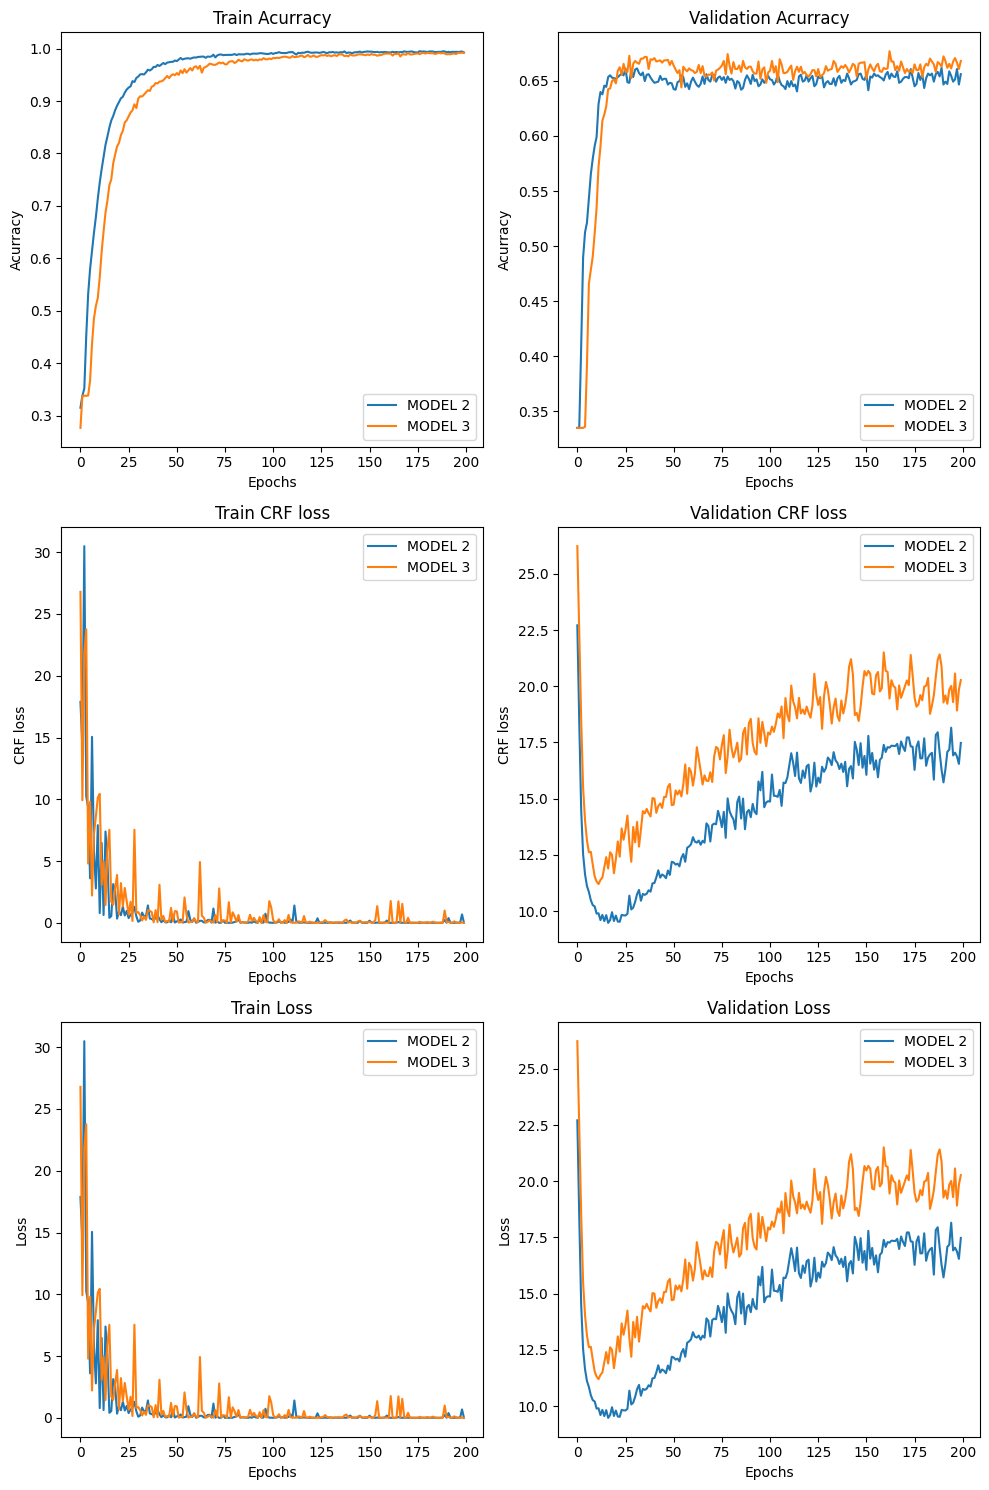

In [ ]:
model2_gr = pd.read_csv('./TRAIN/MODEL_2/csv/model_2.csv')
model3_gr = pd.read_csv('./TRAIN/MODEL_3/csv/model_3.csv')

num_rows = 167
list_df = [model2_gr, model3_gr]
list_lagends = ['MODEL 2','MODEL 3']
list_title_T = ['Train Acurracy','Train CRF loss','Train Loss']
list_title_V = ['Validation Acurracy','Validation CRF loss','Validation Loss']
list_data = ['accuracy','crf_loss','loss']


fig, axes = plt.subplots(3, 2, figsize=(10, 15))
for ind, col in enumerate(list_data):

  for i,df in enumerate(list_df):
    ax = axes[ind,0]
    y = df[col]
    x = df[model2_gr.columns[0]]
    ax.plot(x,y,label = list_lagends[i])
    ax.set_title(list_title_T[ind])
    ax.set_xlabel('Epochs')
    ax.set_ylabel(list_title_T[ind].replace('Train ',''))
    ax.legend()

    ax = axes[ind,1]
    y = df['val_'+ col]
    x = df[model2_gr.columns[0]]
    ax.plot(x,y,label = list_lagends[i])
    ax.set_title(list_title_V[ind])
    ax.set_xlabel('Epochs')
    ax.set_ylabel(list_title_T[ind].replace('Train ',''))
    ax.legend()

plt.tight_layout()
plt.show()

Consolidate results

\begin{array}{|c|c|c|c|}
\hline
\textbf{Tipo de Modelo} & \textbf{Precision} & \textbf{Recall} & \textbf{F1-Score} \\
\hline
\text{Modelo 1. BiLSTM+CRF+entrenización} & 68.1\% & 60.2\% & 63.9\% \\
\hline
\text{Modelo 2. BiLSTM+CRF+embedding} & \text{67.9 %} & \text{64.9 %} & \text{ 66.4 %} \\
\hline
\text{Modelo 3. LSTM(BiLSTM)+CRF+embedding} & \text{70 %} & \text{66.2 %} & \text{68.3 %} \\
\hline
\end{array}
